# 머신러닝

## 학생 결석 여부 확인 데이터

- 성별(sex) 바이너리 : 'F' - 여성 또는 'M' - 남성     
- 나이(age) 숫자: 15 - 22     
- 부모님동거여부 (Pstatus) 바이너리: T: 동거 또는 'A': 별거       
- 엄마학력(Medu) 숫자 : 0 : 없음, 1 : 초등 교육, 2 : 5-9학년, 3 - 중등 교육 또는 4 - 고등 교육    
- 아빠학력(Fedu) 숫자 : 0 : 없음, 1 : 초등 교육, 2 : 5-9학년, 3 - 중등 교육 또는 4 - 고등 교육   
- 주보호자(guardian) 명목형 : '어머니', '아버지' 또는 '기타'     
- 등하교시간(traveltime) 숫자 : 1 : 15분이하, 2 : 15 ~ 30분, 3 : 30분 ~ 1시간, 4 : 1시간 이상       
- 학습시간(studytime) 숫자 : 1 : 2시간이하, 2 : 2~5시간, 3 : 5~10시간, 4 : 10시간이상    
- 학고횟수(failures)  숫자 : 1, 2, 3 else 4     
- 자유시간(freetime) 숫자 : 1(매우 낮음), 2, 3, 4, 5(매우 높음)   
- 가족관계(famrel) 숫자 : 1(매우 나쁨), 2, 3, 4, 5(우수)  

In [1]:
import ssl
import pandas as pd
import urllib
context = ssl._create_unverified_context()

url1 = 'https://raw.githubusercontent.com/Ssunbell/ADP_study/main/7주차_0625/data/problem1.csv'
encoded_url1 = urllib.parse.quote(url1, safe=':/')

response = urllib.request.urlopen(encoded_url1, context=context)
df1 = pd.read_csv(response, encoding='utf-8')
df1

,sex,age,Pstatus,Fedu,Medu,guardian,studytime,traveltime,failures,famrel,freetime,absences
0,F,18.0,A,4,4,mother,2,2.0,0,4,3.0,6
1,F,17.0,T,1,1,father,2,1.0,0,5,3.0,4
2,F,15.0,T,1,1,mother,2,1.0,3,4,3.0,10
3,F,15.0,T,2,4,mother,3,1.0,0,3,2.0,2
4,F,NaN,T,3,3,father,2,1.0,0,4,3.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
390,M,20.0,A,2,2,other,2,1.0,2,5,5.0,11
391,M,17.0,T,1,3,mother,1,2.0,0,2,4.0,3
392,M,21.0,T,1,1,other,1,1.0,3,5,5.0,3
393,M,18.0,T,2,3,mother,1,3.0,0,4,4.0,0


### 1-1 데이터 EDA 및 시각화

info를 통해 데이터 타입 및 결측치 확인

age, traveltime, freetime 에서 결측치 확인

In [2]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         395 non-null    object 
 1   age         392 non-null    float64
 2   Pstatus     395 non-null    object 
 3   Fedu        395 non-null    int64  
 4   Medu        395 non-null    int64  
 5   guardian    395 non-null    object 
 6   studytime   395 non-null    int64  
 7   traveltime  392 non-null    float64
 8   failures    395 non-null    int64  
 9   famrel      395 non-null    int64  
 10  freetime    390 non-null    float64
 11  absences    395 non-null    int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 37.2+ KB


기술 통계량 확인

label인 absences의 평균이 약 5.7, 최대값이 75인 수치형 변수이므로 회귀적인 관점으로 접근해야 함

In [3]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,392.0,16.698980,1.279865,15.0,16.0,17.0,18.0,22.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
traveltime,392.0,1.446429,0.695022,1.0,1.0,1.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,390.0,3.233333,1.000985,1.0,3.0,3.0,4.0,5.0
absences,395.0,5.708861,8.003096,0.0,0.0,4.0,8.0,75.0


absences 컬럼의 최대값이 75이므로 15씩 5개의 그룹으로 나눠서 빈도수 비교

비교 결과 absences 값이 15 이하인 값이 전체 label에서 95% 이상을 차지하는 불균형을 보임

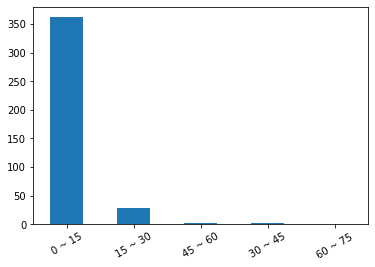

In [26]:
import matplotlib.pyplot as plt

def g(x):
    if x <= 15:
        return '0 ~ 15'
    elif 15 < x <= 30:
        return '15 ~ 30'
    elif 30 < x <= 45:
        return '30 ~ 45'
    elif 45 < x <= 60:
        return '45 ~ 60'
    else:
        return '60 ~ 75'
eda_df = df1.copy()
eda_df['g'] = eda_df['absences'].apply(lambda x: g(x))
eda_df['g'].value_counts().plot(kind='bar')
eda_df = eda_df.sort_values('g', ascending=False)
plt.xticks(rotation=30)
plt.show()

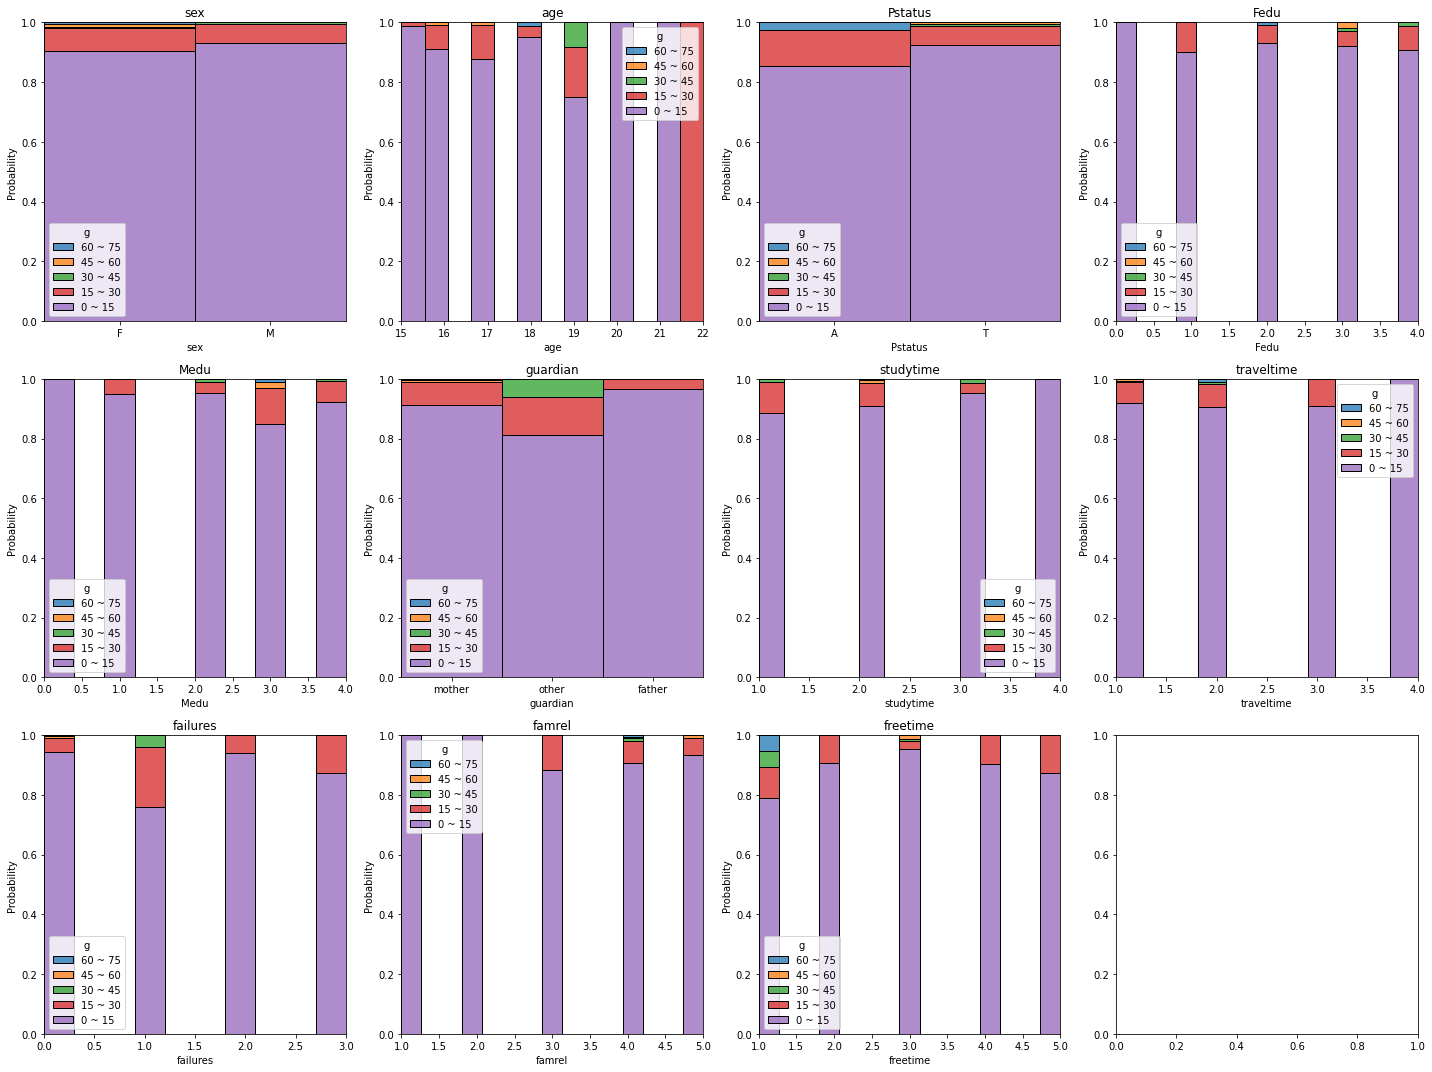

In [27]:
from math import ceil
import seaborn as sns

features = eda_df.columns.tolist()
for column in ['absences', 'g']:
    features.remove(column)

r,c = ceil(len(features)/4), 4
fig, axes = plt.subplots(r, c, figsize=(20, 15))
for i, column in enumerate(features):
    ax_r, ax_c = int(i//c), int(i%c)
    sns.histplot(eda_df, x =column , hue='g', ax = axes[ax_r][ax_c], multiple='fill', stat='probability')
    axes[ax_r][ax_c].set_title(column)

plt.tight_layout()
plt.show()

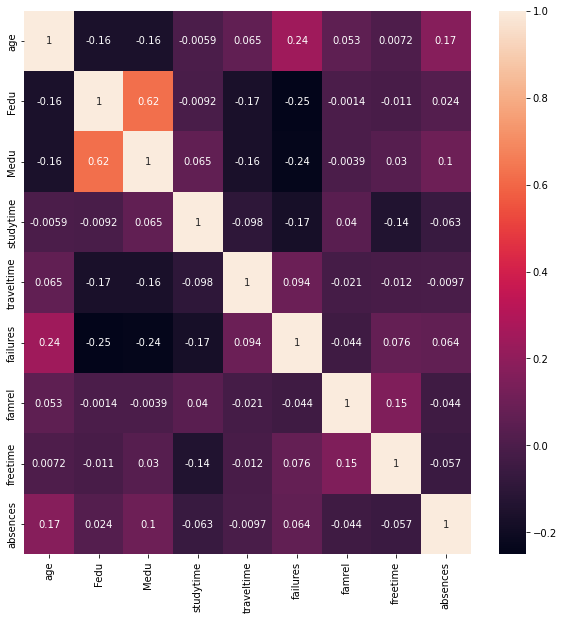

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), annot=True)
plt.show()

### 1-2 결측치 처리 및 변화 시각화, 추가 전처리가 필요하다면 이유와 기대효과를 설명하라

age를 min-max scaling?

결측치 데이터 확인

결측치 데이터 수가 많지 않고 라벨이 비율이 높은 15 이하의 데이터이므로 결측치를 제거해서 진행해도 성능에 큰 하락이 없을 것으로 기대됨

In [30]:
df1[df1[''].isnull().any(axis=1)]

,sex,age,Pstatus,Fedu,Medu,guardian,studytime,traveltime,failures,famrel,freetime,absences
4,F,NaN,T,3,3,father,2,1.0,0,4,3.0,4
31,M,15.0,T,4,4,mother,2,2.0,0,4,NaN,0
33,M,15.0,T,3,3,mother,2,1.0,0,5,NaN,0
66,M,15.0,A,4,4,mother,4,NaN,0,1,3.0,4
96,M,NaN,T,3,4,mother,1,2.0,0,3,3.0,2
97,F,16.0,T,1,2,mother,2,1.0,0,4,NaN,2
153,M,19.0,T,2,3,mother,1,1.0,3,4,NaN,0
284,F,17.0,T,2,2,mother,2,NaN,0,5,4.0,4
316,F,18.0,T,1,2,mother,2,2.0,0,5,NaN,0
321,F,NaN,T,2,2,mother,2,1.0,0,4,2.0,12


In [31]:
df = df1.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 0 to 394
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         384 non-null    object 
 1   age         384 non-null    float64
 2   Pstatus     384 non-null    object 
 3   Fedu        384 non-null    int64  
 4   Medu        384 non-null    int64  
 5   guardian    384 non-null    object 
 6   studytime   384 non-null    int64  
 7   traveltime  384 non-null    float64
 8   failures    384 non-null    int64  
 9   famrel      384 non-null    int64  
 10  freetime    384 non-null    float64
 11  absences    384 non-null    int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 39.0+ KB


sex, Pstatus, guardian 컬럼은 비정형데이터이므로 분석을 위해서 더미 변수로 변환

In [34]:
for column in ['sex', 'Pstatus', 'guardian']:
    dummy = {c:idx for idx, c in enumerate(df[column].unique())}
    df[column] = df[column].apply(lambda x: dummy[x])
df.head()

/Users/yuseonjong/usr/adp/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,sex,age,Pstatus,Fedu,Medu,guardian,studytime,traveltime,failures,famrel,freetime,absences
0,0,18.0,0,4,4,0,2,2.0,0,4,3.0,6
1,0,17.0,1,1,1,1,2,1.0,0,5,3.0,4
2,0,15.0,1,1,1,0,2,1.0,3,4,3.0,10
3,0,15.0,1,2,4,0,3,1.0,0,3,2.0,2
5,1,16.0,1,3,4,0,2,1.0,0,5,4.0,10


### 1-3 결석일수 예측모델을 2개 제시하고 선택한 근거 설명

- 라벨이 연속형인 변수이므로 회귀를 적용해야 함
- 일반적인 선형회귀, 다중회귀, 릿지, 라쏘, 엘라스틱 회귀 등이 있음
- 릿지, 라쏘, 엘라스틱은 규제를 적용하여 좀더 robust한 모델
- 또한, Decision Tree, Random Forest, xgboost 등의 모델을 사용할 수 있음

### 1-4 선정한 모델 2가지 생성 및 모델의 평가 기준을 선정하고 선정 이유 설명

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

features = df.columns.tolist()
target = 'absences'
features.remove(target)

x_train, x_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.1, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((345, 11), (39, 11), (345,), (39,))

L1, L2 규제를 적용하여 이상치에 강건한 선형 회귀 모델을 적용

In [63]:
from sklearn.linear_model import ElasticNet
from time import time

# 엘라스틱 회귀 모델 생성
model = ElasticNet()

# 모델 훈련
model.fit(x_train, y_train)

# 예측
start = time()
y_pred = model.predict(x_test)
end = time()

# 정확도 평가
mse = mean_squared_error(y_test, y_pred)
print("elastic mse:", mse)
print('elastic inference speed:', end - start)

xgboost mse: 19.129716667928104
xgboost inference speed: 0.0021409988403320312


xgboost는 결정 트리를 앙상블한 모델로 최근 가장 성능이 뛰어난 모델

In [64]:
# XGBoost 분류기 모델 생성
xgboost = xgb.XGBRegressor()

# 모델 훈련
xgboost.fit(x_train, y_train)

# 예측
start = time()
y_pred = xgboost.predict(x_test)
end = time()

# 정확도 평가
mse = mean_squared_error(y_test, y_pred)
print("xgboost mse:", mse)
print('xgboost inference speed:', end - start)

xgboost mse: 65.43801929398202
xgboost inference speed: 0.004836082458496094


### 1-5 모델이 다양한 일상 상황에서도 잘 동작한다는 것을 설명하고 시각화 하라

일상 상황에서도 잘 동작하기 위해서는 다음 2가지를 만족해야 한다.
 - 추론 속도
 - 이상치에 강건

일상 생활에서는 사용자의 편의성을 위해 추론 속도가 빨라야 하며, 평소에 접하지 못하는 이상치에 민감하지 않은 모델이어야 한다.


이러한 측면에서 엘라스틱 회귀는 L1, L2 규제를 통해 이상치에 강건하며, 학습 속도도 빠른 편이므로 일상 생활에서도 잘 작동될 것으로 기대된다.



### 1-6 모델 최적화 방안에 대해 구체적으로 설명하라

현재 데이터는 불균형한 데이터이므로 이러한 관점에서 두가지 최적화 방안이 존재한다.
- 교차검증을 통해 좀더 강건한 모델을 만든다.
- 오버 샘플링(데이터 증강) 기법을 적용하여 부족한 데이터의 수를 보완한다.

그 외에도 하이퍼 파라미터 튜닝, AutoML 등의 기법이 있다.

1:34:00 걸림

# 통계분석

### 2. 광고횟수와 광고비에 따른 매출액의 데이터이다. 

In [66]:
import pandas as pd

data = {
    '광고횟수' : [2, 3, 4, 4, 5, 6, 7, 9, 11, 12, 13],
    '광고비' : ["낮음", "낮음", "낮음", "높음", "높음", "높음", "낮음", "높음", "높음", "낮음", "높음"],
    '매출액' : [15, 16, 17, 18, 20, 22, 24, 26, 28, 29, 31]
}

adv = pd.DataFrame(data)
adv

,광고횟수,광고비,매출액
0,2,낮음,15
1,3,낮음,16
2,4,낮음,17
3,4,높음,18
4,5,높음,20
5,6,높음,22
6,7,낮음,24
7,9,높음,26
8,11,높음,28
9,12,낮음,29


### 2-1 광고비 변수를 가변수 처리후 다중회귀를 수행하여 회귀계수가 유의한지 검정

H0 : 모든 회귀계수는 0이다.

H1 : 모든 회귀계수는 0이 아니다.

F 통계량의 값이 221.2이고 p-value 값이 9.96e-08 이므로 귀무가설을 기각. 모든 회귀계수는 0이 아니다.

In [71]:
import statsmodels.api as sm

dummy = {a : idx for idx, a in enumerate(adv['광고비'].unique())}
adv['광고비'] = adv['광고비'].apply(lambda x: dummy[x])
X = sm.add_constant(adv[['광고횟수', '광고비']])
Y = adv['매출액']

model = sm.OLS(Y, X)
fitted = model.fit()

print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    매출액   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     221.2
Date:                Sat, 01 Jul 2023   Prob (F-statistic):           9.96e-08
Time:                        15:57:42   Log-Likelihood:                -11.883
No. Observations:                  11   AIC:                             29.77
Df Residuals:                       8   BIC:                             30.96
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.1641      0.556     21.876      0.0

/Users/yuseonjong/usr/adp/lib/python3.7/site-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


### 2-2 회귀식이 유의한지 판단

R-squared값과 Adjusted R-squared값이 1에 가깝기 때문에 회귀식이 유의하지만,

광고비 변수의 p-value가 0.05보다 높으므로 광고비 변수는 종속변수를 설명하는데 유의하지 않은 변수임을 알 수 있다.

### 3. A생산라인의 제품 평균은 5.7mm이고 표준편차는 0.03, B생산라인의 제품 평균은 5.6mm이고 표준편차는 0.04라면 5%유의수준으로 두 제품의 평균이 차이가 있는지 여부를 검정하기 Z(0.05) = 1.65

### 3-1 귀무가설과 대립가설을 세워라 

H0 : 두 제품의 평균의 차이는 0이다.

H1 : 두 제품의 평균의 차이는 0이 아니다.

### 3-2 두 평균이 차이가 있는지 검정하라

In [86]:
# 두 제품이 정규분포를 따른다고 가정
from scipy.stats import norm

m1 = 5.7
m2 = 5.6
s1 = 0.03
s2 = 0.04
alpha = 0.05

m_diff = m1 - m2
e = ((s1**2) + (s2**2))**(1/2)

z_statistic = m_diff / e
p_value = 2 * (1 - norm.cdf(abs(z_statistic)))

if p_value <= alpha:
    print('귀무가설 기각, 대립가설 채택')
else:
    print('귀무가설 채택')

귀무가설 기각, 대립가설 채택


### 4. 진단키트 결과 양성이 나왔을 때, 진짜 그 병에 걸렸을 확률은? 베이즈 정리를 사용하여 계산하라. (유병율 = 0.01)

![](https://github.com/Ssunbell/ADP_study/blob/main/7주차_0625/data/problem4.png?raw=true)

In [117]:
# 베이즈 정리
# P(실제 양성 | 테스트 양성) = P(테스트 양성 | 실제 양성) * P(실제 양성) / P(테스트 양성)

p = {
    'n11' : 370,
    'n10' : 10,
    'n01' : 15,
    'n00' : 690
}
true = 0.01
pred = (p['n11'] + p['n10']) / (p['n11'] + p['n10'] + p['n01'] + p['n00'])
prob = ((p['n11'] / (p['n11'] + p['n10'])) * true) / pred
print(f'{round(prob * 100,2)}%')

2.78%


### 5 주어진 데이터에서 신뢰구간을 구하려한다
정규분포에서 표폰을 추출함[Z(0.05) = -1.65 , Z(0.025) = -1.96, T(0.05, 8) = 1.860 , T0.025(0.025, 8) = 2.306]

In [89]:
data = [3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.4, 4.7]

### 5-1 모분산을 모르는 경우 주어진 데이터의 95% 신뢰구간을 구하라

모분산을 모르는 경우 t-검정을 통해 신뢰구간을 구한다.

In [110]:
import scipy

def confidence_interval(critical_value, m, s, n):
    margin_of_error = critical_value * (s / (n**(1/2)))
    confidence_interval = (round(m - margin_of_error,4), round(m + margin_of_error,4))

    print("Confidence Interval:", confidence_interval)

n = len(data)

m = sum(data) / n
s = (sum([(x-m)**2 for x in data])/(n-1))**(1/2)

# t-분포의 임계값
# 1. 신뢰수준이 0.95일 경우
t_critical = 2.306
print('신뢰수준 0.95')
confidence_interval(t_critical, m, s, n)

# 2. 신뢰수준이 0.9일 경우
t_critical = 1.860
print('신뢰수준 0.9')
confidence_interval(t_critical, m, s, n)



신뢰수준 0.95
Confidence Interval: (3.4777, 4.3)
신뢰수준 0.9
Confidence Interval: (3.5573, 4.2205)


### 5.2 sigma = 0.04인걸 알고있을때의 95% 신뢰구간을 구하라 

In [111]:
import scipy

n = len(data)

m = sum(data) / n
s = 0.04

# z-분포의 임계값
# 1. 신뢰수준이 0.95일 경우
z_critical = 1.96
print('신뢰수준 0.95')
confidence_interval(z_critical, m, s, n)

# 2. 신뢰수준이 0.9일 경우
z_critical = 1.65
print('신뢰수준 0.9')
confidence_interval(z_critical, m, s, n)

신뢰수준 0.95
Confidence Interval: (3.8628, 3.915)
신뢰수준 0.9
Confidence Interval: (3.8669, 3.9109)
